## Install Dependencies

In [1]:
!pip install qc-procrustes > /dev/null
!pip install qc-selector > /dev/null

## Explorative Data Analysis with A Drug Discovery Case Study

### Basic EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the data

In [3]:
# prompt: Load data from https://raw.githubusercontent.com/QC-Edu/workshops/refs/heads/main/edia_training/drug_discovery/top_649_compounds_maccs_fps.csv into pandas and show me all the columns. The provided csv file uses tab as seprator.

import pandas as pd

url = "https://raw.githubusercontent.com/QC-Edu/workshops/refs/heads/main/edia_training/drug_discovery/top_649_compounds_maccs_fps.csv"
df = pd.read_csv(url, sep='\t')

df.columns


Index(['s_m_entry_id', 'ID', 'r_glide_XP_GScore', 'ALogP', 'Molecular_Weight',
       'Molecular_Volume', 'Molecular_PolarSurfaceArea',
       'Molecular_Solubility', 'maccs'],
      dtype='object')

In [4]:
# prompt: show me the first few lines of the table without using print function.

df.head()


,s_m_entry_id,ID,r_glide_XP_GScore,ALogP,Molecular_Weight,Molecular_Volume,Molecular_PolarSurfaceArea,Molecular_Solubility,maccs
0,1,ethyl 2-amino-5-#3-nitrophenyl#-7-methyl-4-oxo...,-7.611758,-0.665,379.411,235.98,160.68,-3.230,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
1,2,2-chloro-N-#2-[2-(4-nitrobenzylidene)hydrazino...,-6.569726,0.421,368.815,223.29,125.43,-5.113,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
2,3,N-[2-(2-#4-nitrobenzylidene#hydrazino)-2-oxoet...,-6.239696,-0.471,392.406,234.26,143.89,-4.031,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
3,4,4-[(#4-nitrobenzylidene#amino)methyl]benzenesu...,-6.915375,0.152,327.399,196.53,135.76,-4.481,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
4,5,ethyl 6-#[2-(4-bromoanilino)-2-oxoethyl]sulfan...,-7.438132,1.747,572.492,328.25,200.28,-6.344,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0...


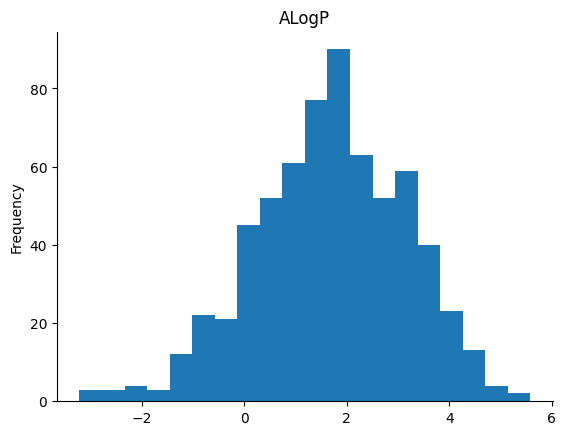

In [5]:
# @title ALogP

from matplotlib import pyplot as plt
df['ALogP'].plot(kind='hist', bins=20, title='ALogP')
plt.gca().spines[['top', 'right',]].set_visible(False)

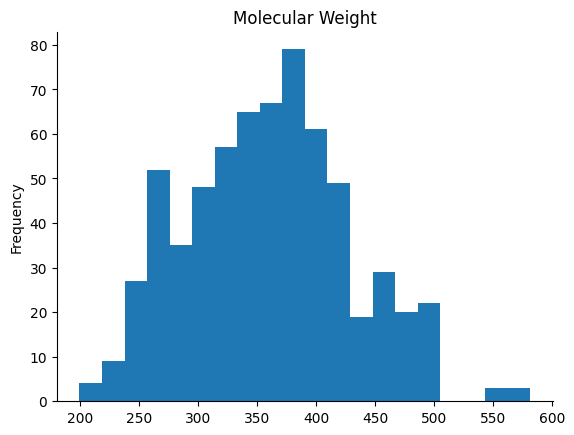

In [6]:
# prompt: Help me plot the distributions of "Molecular_Weight" with matplotlib.

# Molecular Weight
df['Molecular_Weight'].plot(kind='hist', bins=20, title='Molecular Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)


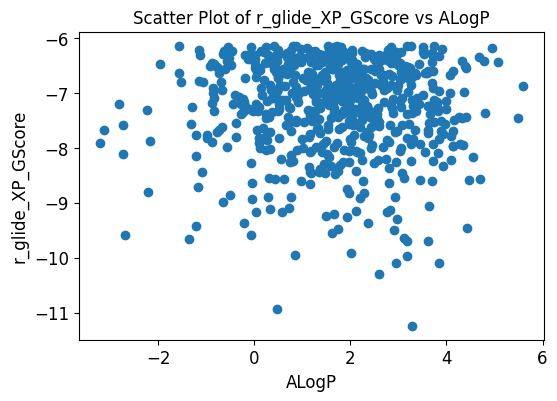

In [7]:
# prompt: Help me plot scatter plot for the docking socre "r_glide_XP_GScore" vs  "ALogP".  Figure size (6, 4), fonts 12.

# Plot r_glide_XP_GScore vs ALogP
plt.figure(figsize=(6, 4))
plt.scatter(df['ALogP'], df['r_glide_XP_GScore'])
plt.xlabel('ALogP', fontsize=12)
plt.ylabel('r_glide_XP_GScore', fontsize=12)
plt.title('Scatter Plot of r_glide_XP_GScore vs ALogP', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Selecting Representative Data Points with `Selector` Python Package

**How to encode maccs column as `numpy` array?**:

Ask gemini tool on the top right connor.

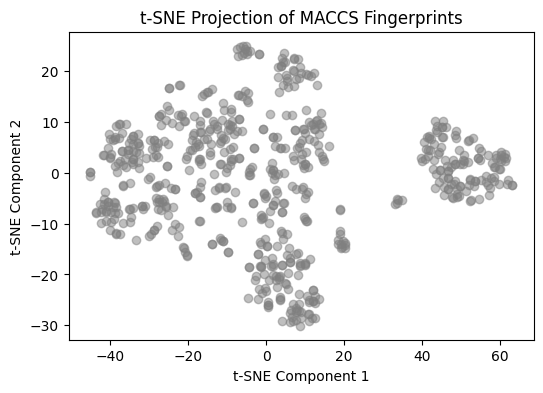

In [12]:
# prompt: Help me encode the column of "maccs" as a numpy array called "maccs_array" and use it as features to t-SNE projection into 2D space. Then plot it as scatter plot in grey with alpha 0.5. Figure size (6, 4) and marker size 30.

import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'df' is already loaded and contains the 'maccs' column

# # Convert MACCS fingerprints to NumPy array
# maccs_array = np.array(df['maccs'].apply(lambda x: [int(i) for i in x.strip("[]").split(" ")]).to_list())
# Encode the 'maccs' column as a NumPy array
maccs_array = np.array(df['maccs'].apply(lambda x: np.fromstring(x[1:-1], dtype=int, sep=' ')).tolist())

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30) # Adjust perplexity as needed
maccs_tsne = tsne.fit_transform(maccs_array)


# Plot the t-SNE projection
plt.figure(figsize=(6, 4))
plt.scatter(maccs_tsne[:, 0], maccs_tsne[:, 1], c='gray', alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Projection of MACCS Fingerprints')
plt.show()

In [9]:
maccs_array

array([], shape=(649, 0), dtype=int64)

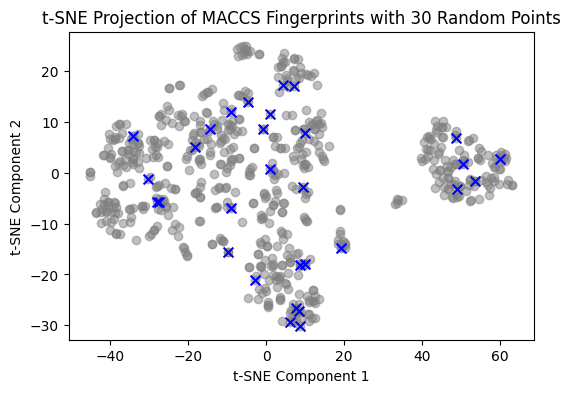

In [13]:
# prompt: select 30 data points randomly from the original projected TSNE data maccs_tsne, and plot them as blue cross markers. Plot the original full data of TSNE in grey with alpha 0.5. Figure size (6, 4).

import random

# Select 30 random indices
random_indices = random.sample(range(len(maccs_tsne)), 30)

# Plot the t-SNE projection with selected points highlighted
plt.figure(figsize=(6, 4))
plt.scatter(maccs_tsne[:, 0], maccs_tsne[:, 1], c='gray', alpha=0.5)
plt.scatter(maccs_tsne[random_indices, 0], maccs_tsne[random_indices, 1], c='blue', marker='x', s=50) # Increased marker size for better visibility
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Projection of MACCS Fingerprints with 30 Random Points')
plt.show()


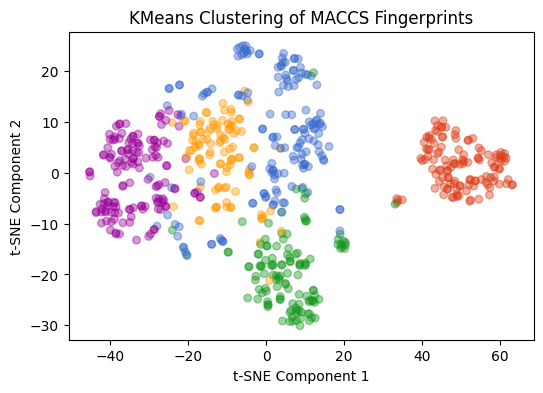

In [14]:
# prompt: Cluster the data into 5 classes with "maccs_array" using Kmeans in sklearn. Plot them as 2d scatter plot using matplotlib with `colors = np.array(px.colors.qualitative.G10)` by matching the predicted class label. Figure size (6, 4) with alpha 0.4, marker size 30.

from sklearn.cluster import KMeans
import plotly.express as px

# Assuming 'maccs_array' is already defined as in the previous code

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(maccs_array)
predicted_labels = kmeans.predict(maccs_array)

# Plot the clusters
colors = np.array(px.colors.qualitative.G10)
plt.figure(figsize=(6, 4))
plt.scatter(maccs_tsne[:, 0], maccs_tsne[:, 1], c=colors[predicted_labels], alpha=0.4, s=30)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('KMeans Clustering of MACCS Fingerprints')
plt.show()


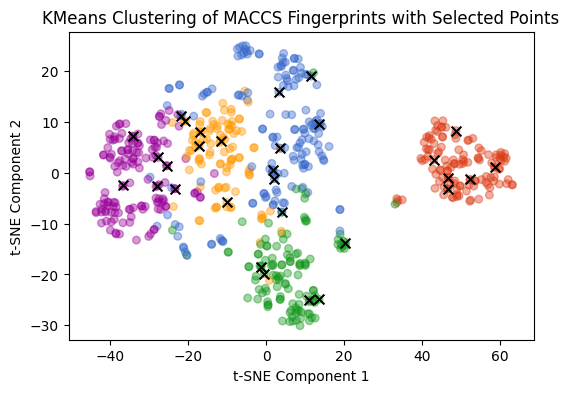

In [15]:
# prompt: Select 6 points from each cluster so that we have 30 data points selected by using the maccs_array. When we do plotting, we will use the projected data `maccs_tsne` for plotting. Use the black cross to denote the selected data. Figure size (6, 4), alpha 0.4.

# Select 6 points from each cluster
selected_indices = []
for i in range(5):  # Iterate through clusters 0 to 4
    cluster_indices = np.where(predicted_labels == i)[0]
    selected_indices.extend(random.sample(list(cluster_indices), 6))

# Plot the clusters with selected points highlighted
plt.figure(figsize=(6, 4))
plt.scatter(maccs_tsne[:, 0], maccs_tsne[:, 1], c=colors[predicted_labels], alpha=0.4, s=30)
plt.scatter(maccs_tsne[selected_indices, 0], maccs_tsne[selected_indices, 1], c='black', marker='x', s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('KMeans Clustering of MACCS Fingerprints with Selected Points')
plt.show()


Can we do better?

Add a link to MaxMin algorithm and the package documentation.

put hyperlink

https://github.com/theochem/Selector/blob/c04a253a928c6abe6c664c4090998187a5407e7e/selector/methods/distance.py#L42

In [17]:
# prompt: Now we use the MaxMin selection  algorithms for selecting 6 data points in each class. MaxMin algorithms implemented https://github.com/theochem/Selector/blob/c04a253a928c6abe6c664c4090998187a5407e7e/selector/methods/distance.py#L42 which is part of https://github.com/theochem/Selector. The documentation for MaxMin is at https://selector.qcdevs.org/api_methods_distance.html#selector.methods.distance.MaxMin and an example is shown in https://selector.qcdevs.org/tutorial_distance_based.html. We need to compute the distance matrix with the `maccs_array` and pass the distance matrix to MaxMin algorithm. Once we have selected data points, print out the selected indices.

from sklearn.metrics import pairwise_distances
from selector import MaxMin
import numpy as np

fun_dist=lambda x: pairwise_distances(x, metric="euclidean")

# Initialize and run the MaxMin algorithm
selector_maxmin = MaxMin(fun_dist=fun_dist) # Use 'precomputed' since we provide the distance matrix
# Get unique labels and their counts
unique_labels, unique_label_counts = np.unique(predicted_labels, return_counts=True)

# Adjust size for clusters with fewer than 6 data points
size_per_cluster = np.minimum(unique_label_counts, 6)  # Select at most 6, or fewer if cluster is smaller
total_size = np.sum(size_per_cluster) # Calculate the total size based on adjusted per-cluster sizes

# Perform selection with adjusted size and labels mapping
labels_mapping = {label: i for i, label in enumerate(unique_labels)}
remapped_labels = np.array([labels_mapping[label] for label in predicted_labels])
selected_indices_maxmin = selector_maxmin.select(maccs_array, size=total_size, labels=remapped_labels)

print("Selected Indices using MaxMin Algorithm:")
print(selected_indices_maxmin)

Selected Indices using MaxMin Algorithm:
[529, 7, 8, 63, 211, 366, 177, 68, 121, 648, 147, 174, 419, 183, 367, 525, 138, 514, 124, 319, 325, 542, 513, 285, 113, 243, 620, 248, 375, 117]


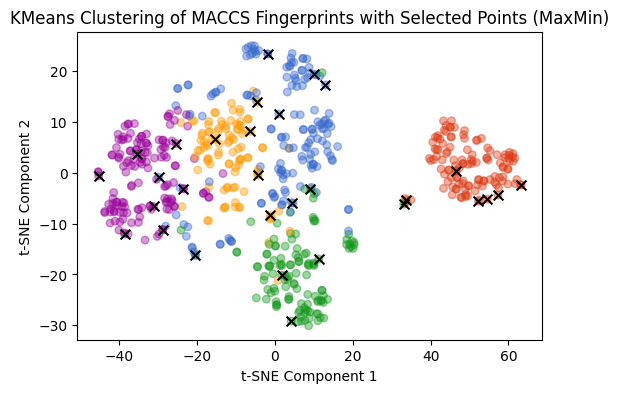

In [18]:
# prompt: Plot the selected data points with black cross using the same configurations above.

# Plot the clusters with selected points highlighted using MaxMin
plt.figure(figsize=(6, 4))
plt.scatter(maccs_tsne[:, 0], maccs_tsne[:, 1], c=colors[predicted_labels], alpha=0.4, s=30)
plt.scatter(maccs_tsne[selected_indices_maxmin, 0], maccs_tsne[selected_indices_maxmin, 1], c='black', marker='x', s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('KMeans Clustering of MACCS Fingerprints with Selected Points (MaxMin)')
plt.show()


## Bonus: Automatic EDA with `autoviz`

In [19]:
!pip install autoviz > /dev/null

In [20]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [21]:
df_selected = df[['s_m_entry_id', 'ID', 'r_glide_XP_GScore', 'ALogP', 'Molecular_Weight',
       'Molecular_Volume', 'Molecular_PolarSurfaceArea',
       'Molecular_Solubility']]
AutoViz_Class().AutoViz(filename=None, dfte=df_selected, chart_format='bokeh', depVar='r_glide_XP_GScore')

Shape of your Data Set loaded: (649, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  1
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    7 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['s_m_entry_id']

################ Regression problem #################

Column
    [0] Row
        [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=600)
        [1] WidgetBox(align=('end', 'start'))
            [0] Select(options=[np.str_('ALogP'), ...], value=np.str_('ALogP'))

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['ALogP', 'Molecular_Weigh...], value='ALogP')
        [1] Select(name='Y-Axis', options=['ALogP', 'Molecular_Weigh...], value='Molecular_Weight')
        [2] Select(name='Color', options=['None', 'r_glide_XP_GScor...], value='None')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

Column
    [0] Row
        [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=600)
        [1] WidgetBox(align=('end', 'start'))
            [0] Select(options=[np.str_('ALogP'), ...], value=np.str_('ALogP'))

HoloViews(Distribution, height=400, sizing_mode='fixed', width=600)

DataError: Dimensions may not reference duplicated DataFrame columns (found duplicate 'Molecular_' columns). If you want to plot a column against itself simply declare two dimensions with the same name.

PandasInterface expects tabular data, for more information on supported datatypes see https://holoviews.org/user_guide/Tabular_Datasets.html

In [22]:
import pandas as pd
# ... (rest of your imports)

# ... (your code up to df.columns)

# Remove "Molecular" from column names
df_selected = df_selected.rename(columns=lambda x: x.replace('Molecular_', ''))

df_selected.columns

Index(['s_m_entry_id', 'ID', 'r_glide_XP_GScore', 'ALogP', 'Weight', 'Volume',
       'PolarSurfaceArea', 'Solubility'],
      dtype='object')

In [23]:
AutoViz_Class().AutoViz(filename=None, dfte=df_selected, chart_format='bokeh', depVar='r_glide_XP_GScore')

Shape of your Data Set loaded: (649, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  1
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    7 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['s_m_entry_id']

################ Regression problem #################

Column
    [0] Row
        [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=600)
        [1] WidgetBox(align=('end', 'start'))
            [0] Select(options=[np.str_('ALogP'), ...], value=np.str_('ALogP'))

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['ALogP', 'Weight', ...], value='ALogP')
        [1] Select(name='Y-Axis', options=['ALogP', 'Weight', ...], value='Weight')
        [2] Select(name='Color', options=['None', 'r_glide_XP_GScor...], value='None')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

Column
    [0] Row
        [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=600)
        [1] WidgetBox(align=('end', 'start'))
            [0] Select(options=[np.str_('ALogP'), ...], value=np.str_('ALogP'))

HoloViews(Distribution, height=400, sizing_mode='fixed', width=600)

HoloViews(Violin, height=300, sizing_mode='fixed', width=700)

No date vars could be found in data set


HoloViews(Overlay, height=500, sizing_mode='fixed', width=600)

Time to run AutoViz (in seconds) = 6


,ID,ALogP,Weight,Volume,PolarSurfaceArea,Solubility,r_glide_XP_GScore
0,"ethyl 2-amino-5-#3-nitrophenyl#-7-methyl-4-oxo-3,4,5,8-tetrahydropyrid",-0.665,379.411,235.98,160.68,-3.230,-7.611758
1,2-chloro-N-#2-[2-(4-nitrobenzylidene)hydrazino]-2-oxoethyl#benzamide,0.421,368.815,223.29,125.43,-5.113,-6.569726
2,"N-[2-(2-#4-nitrobenzylidene#hydrazino)-2-oxoethyl]-2,3-dihydro-1,4-ben",-0.471,392.406,234.26,143.89,-4.031,-6.239696
3,4-[(#4-nitrobenzylidene#amino)methyl]benzenesulfonamide,0.152,327.399,196.53,135.76,-4.481,-6.915375
4,ethyl 6-#[2-(4-bromoanilino)-2-oxoethyl]sulfanyl#-5-cyano-4-#2-nitroph,1.747,572.492,328.25,200.28,-6.344,-7.438132
...,...,...,...,...,...,...,...
644,"N'-#4-nitrobenzoyl#[1,1'-biphenyl]-4-carbohydrazide",1.403,369.414,227.06,113.07,-5.706,-6.304491
645,2-amino-5-(#3-nitroanilino#carbonyl)-4-methyl-3-thienyl propionate,0.880,357.425,226.37,164.53,-3.785,-7.488310
646,"N-[2-(acetylamino)ethyl]-3-[(6-ethylthieno[2,3-d]pyrimidin-4-yl)amino]",0.772,335.425,224.32,124.25,-4.405,-6.485439
647,"1-#3-[(6-methylthieno[2,3-d]pyrimidin-4-yl)amino]propanoyl#-4-piperidi",0.593,347.435,228.78,129.44,-3.685,-7.122396


## Upload data to Google Colab

In [ ]:
from google.colab import files
uploaded = files.upload()